In [1]:
from standardInclude import *

#hep.mpl_magic()

#plt.style.use({"xtick.alignment":'bottom'})

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [2]:
x = [1,2,3,4,5,6]
y = [2,4,6.2,9,10,13]
yerr = [1,1,1,2,1,1]
xerr = [0 for i in range(len(x))]

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
plt.errorbar(x,y,yerr=yerr,fmt=".:")
f1 = r.TF1("f1","pol1",2,5.5,2)
ding = fitVector(x,y, f1, xerr, yerr)
print(ding)
ding.drawConfidenceIntervals(plt, 'blue', '95% Confidence Interval')
ding.drawFitResult(plt)
plt.grid()
plt.legend()
plt.title("Example Title")
plt.xlabel(r"Something in units of [$\mu s$]")
plt.ylabel(r"N [$\omega_{a}$]")
plt.show()

In [ ]:
ding.draw("Example Title")
plt.show()

In [ ]:
for i, xi in enumerate(ding):
    print(i,xi)

In [3]:
npoints = 1000
points = [10*np.sin(x + 0.3) + np.sin(10*x + 0.67)+4*np.sin(100*x) for x in np.linspace(1,100,npoints)]
#points = [np.exp(-x/10) for x in np.linspace(1,100,npoints)]
xs = [x for x in np.linspace(0,1,npoints)]

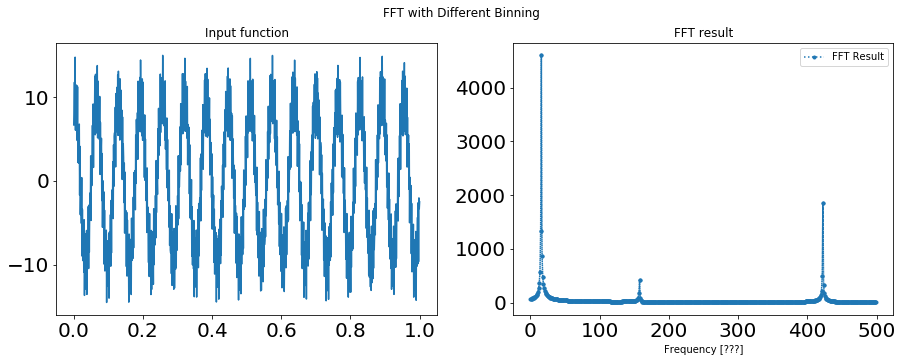

In [4]:
ding = np.fft.fft(np.array(points))
n = len(points)
d = xs[1] - xs[0]
freq = np.fft.fftfreq(n, d)
fig, ax = plt.subplots(1,2,figsize=(15, 5))
ax[0].plot(xs,points,"-")
ax[0].set_title("Input function")
ax[1].set_title("FFT result")
ax[1].plot([np.abs(x) for x in freq],np.abs(ding),'.:',label='FFT Result')
#ax[1].set_xlim(0,50)
plt.xlabel("Frequency [???]")
#plt.xlim(0,6.7157787731503555 / 2)# *10.**6)
plt.legend()
plt.suptitle("FFT with Different Binning")
plt.show()

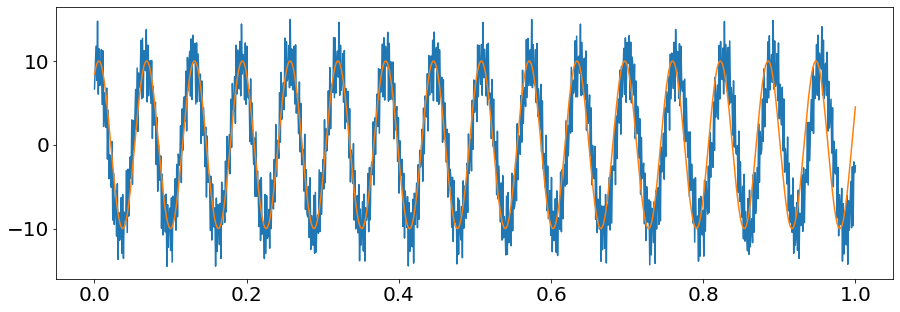

In [5]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(xs,points,"-")

func = r.TF1("func","[0] + [1]*TMath::Sin([2]*x + [3])",0,1)
func.SetParameters(0,10,100,1)
ding = TF1toVector(func, 0, 1, 1000)
plt.plot(ding[0], ding[1])

plt.show()

In [6]:
fitresult = fitVector(xs, points, func)

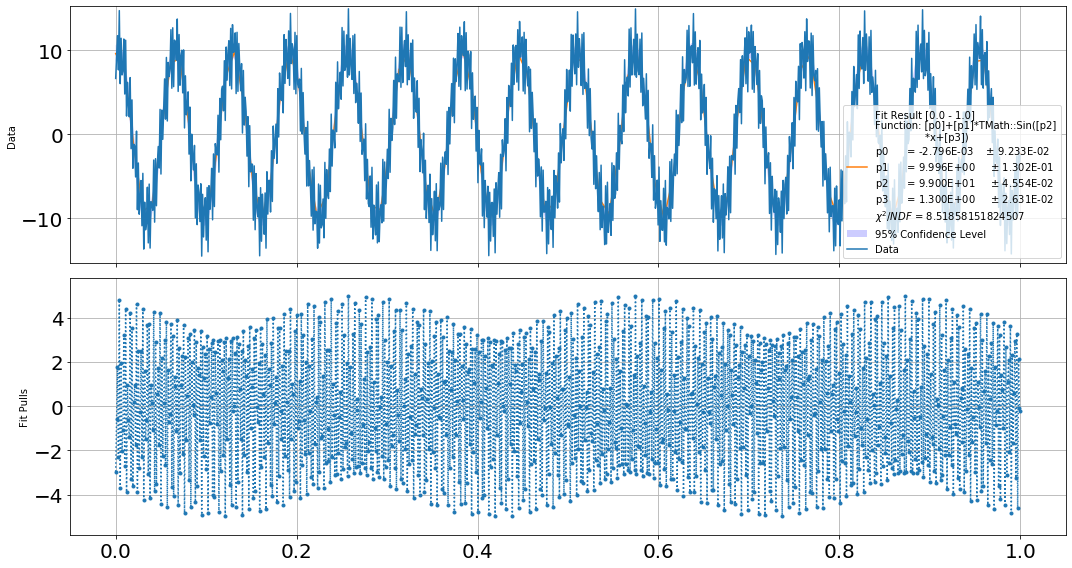

In [7]:
fig, ax = fitresult.draw(do_pulls=False)

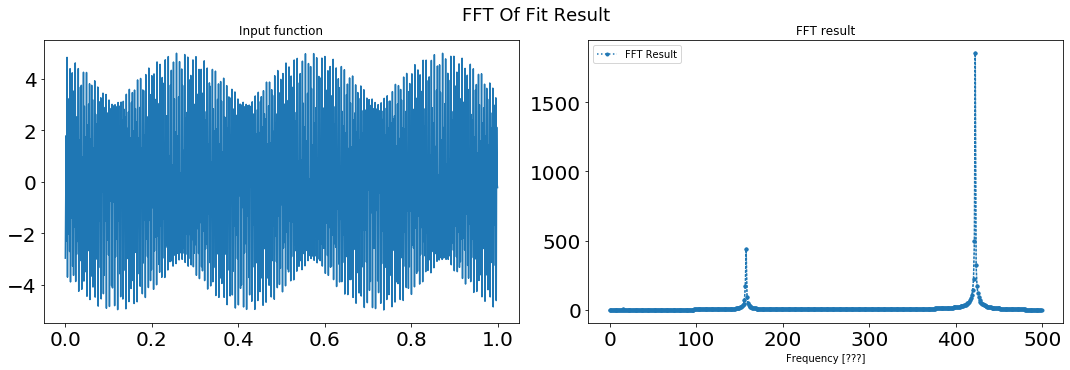

(array([   0.   ,    0.999,    1.998,    2.997,    3.996,    4.995,
           5.994,    6.993,    7.992,    8.991,    9.99 ,   10.989,
          11.988,   12.987,   13.986,   14.985,   15.984,   16.983,
          17.982,   18.981,   19.98 ,   20.979,   21.978,   22.977,
          23.976,   24.975,   25.974,   26.973,   27.972,   28.971,
          29.97 ,   30.969,   31.968,   32.967,   33.966,   34.965,
          35.964,   36.963,   37.962,   38.961,   39.96 ,   40.959,
          41.958,   42.957,   43.956,   44.955,   45.954,   46.953,
          47.952,   48.951,   49.95 ,   50.949,   51.948,   52.947,
          53.946,   54.945,   55.944,   56.943,   57.942,   58.941,
          59.94 ,   60.939,   61.938,   62.937,   63.936,   64.935,
          65.934,   66.933,   67.932,   68.931,   69.93 ,   70.929,
          71.928,   72.927,   73.926,   74.925,   75.924,   76.923,
          77.922,   78.921,   79.92 ,   80.919,   81.918,   82.917,
          83.916,   84.915,   85.914,   86.913, 

In [8]:
fitresult.fft(None, 1)